In [1]:
# dilation and erosion - morphological image processing
# learning resource - https://www.slideshare.net/aswinishere007/dilation-and-erosion-39733096
# learning resource - https://www.cis.rit.edu/class/simg782.old/lec_morphology.html
import numpy  as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

'''
(A ^ B) - binary image complement operation
(A & B) - binary image intersection
(A | B) - binary image union
(A & (B ^ 1)) - binary image set difference
'''

'\n(A ^ B) - binary image complement operation\n(A & B) - binary image intersection\n(A | B) - binary image union\n(A & (B ^ 1)) - binary image set difference\n'

In [2]:
# n x m image kernel / structuring element initialization
n, m = 25, 25 # kernal dimensions should be odd
kernel = np.ones((n, m), dtype = np.int32)

Text(0.5, 1.0, 'Original Image')

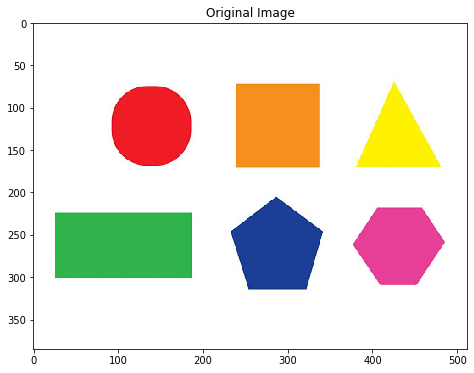

In [3]:
plt.rcParams["figure.figsize"] = (10, 6)
RGB_image = mpimg.imread("image.png")
plt.imshow(RGB_image)
plt.title("Original Image")

Text(0.5, 1.0, 'Eroded Image')

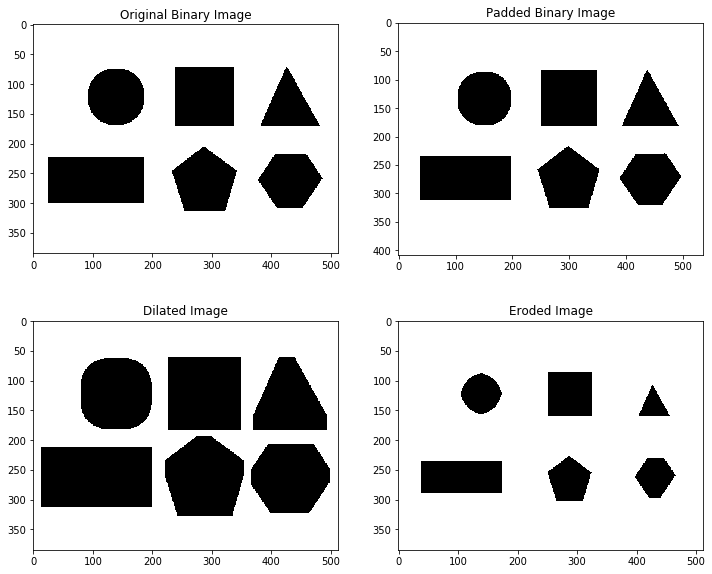

In [4]:
plt.rcParams["figure.figsize"] = (12, 10)
# RGB to binary conversion
binary_image = np.sum(RGB_image, axis = 2) / 3
binary_image = np.where(binary_image > 0.75, 0, 1)

# original binary image show
plt.subplot(2, 2, 1)
plt.imshow(binary_image, cmap = "binary")
plt.title("Original Binary Image")

# padded binary image
row, col = binary_image.shape
padded_binary_image = np.zeros((row + n - 1, col + m - 1), dtype = np.int32)
padded_binary_image[n//2 : -(n//2), m//2 : -(m//2)] = binary_image[:, :].copy()

# padded original binary image show
plt.subplot(2, 2, 2)
plt.imshow(padded_binary_image, cmap = "binary")
plt.title("Padded Binary Image")

# dilation - morphological image processing
row, col      = binary_image.shape
dilated_image = binary_image.copy()

for i in range(row):
    for j in range(col):
        tmp_img = padded_binary_image[i : i+n, j : j+m].copy()
        if np.sum(tmp_img == kernel) > 0:
            dilated_image[i, j] = 1
        else:
            dilated_image[i, j] = 0

# dilated image show
plt.subplot(2, 2, 3)
plt.imshow(dilated_image, cmap = "binary")
plt.title("Dilated Image")

# erosion - morphological image processing
row, col     = binary_image.shape
eroded_image = binary_image.copy()

for i in range(row):
    for j in range(col):
        tmp_img = padded_binary_image[i : i+n, j : j+m].copy()
        if np.sum(tmp_img == kernel) == n*m:
            eroded_image[i, j] = 1
        else:
            eroded_image[i, j] = 0
            
# erased image show
plt.subplot(2, 2, 4)
plt.imshow(eroded_image, cmap = "binary")
plt.title("Eroded Image")